<a href="https://colab.research.google.com/github/Aravindraprasad/ML-Algorithm/blob/main/Titanic_Predict_with_PipeLines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn .preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier


In [4]:
df = pd.read_csv('/content/train (1).csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


This is plan for Pipeline

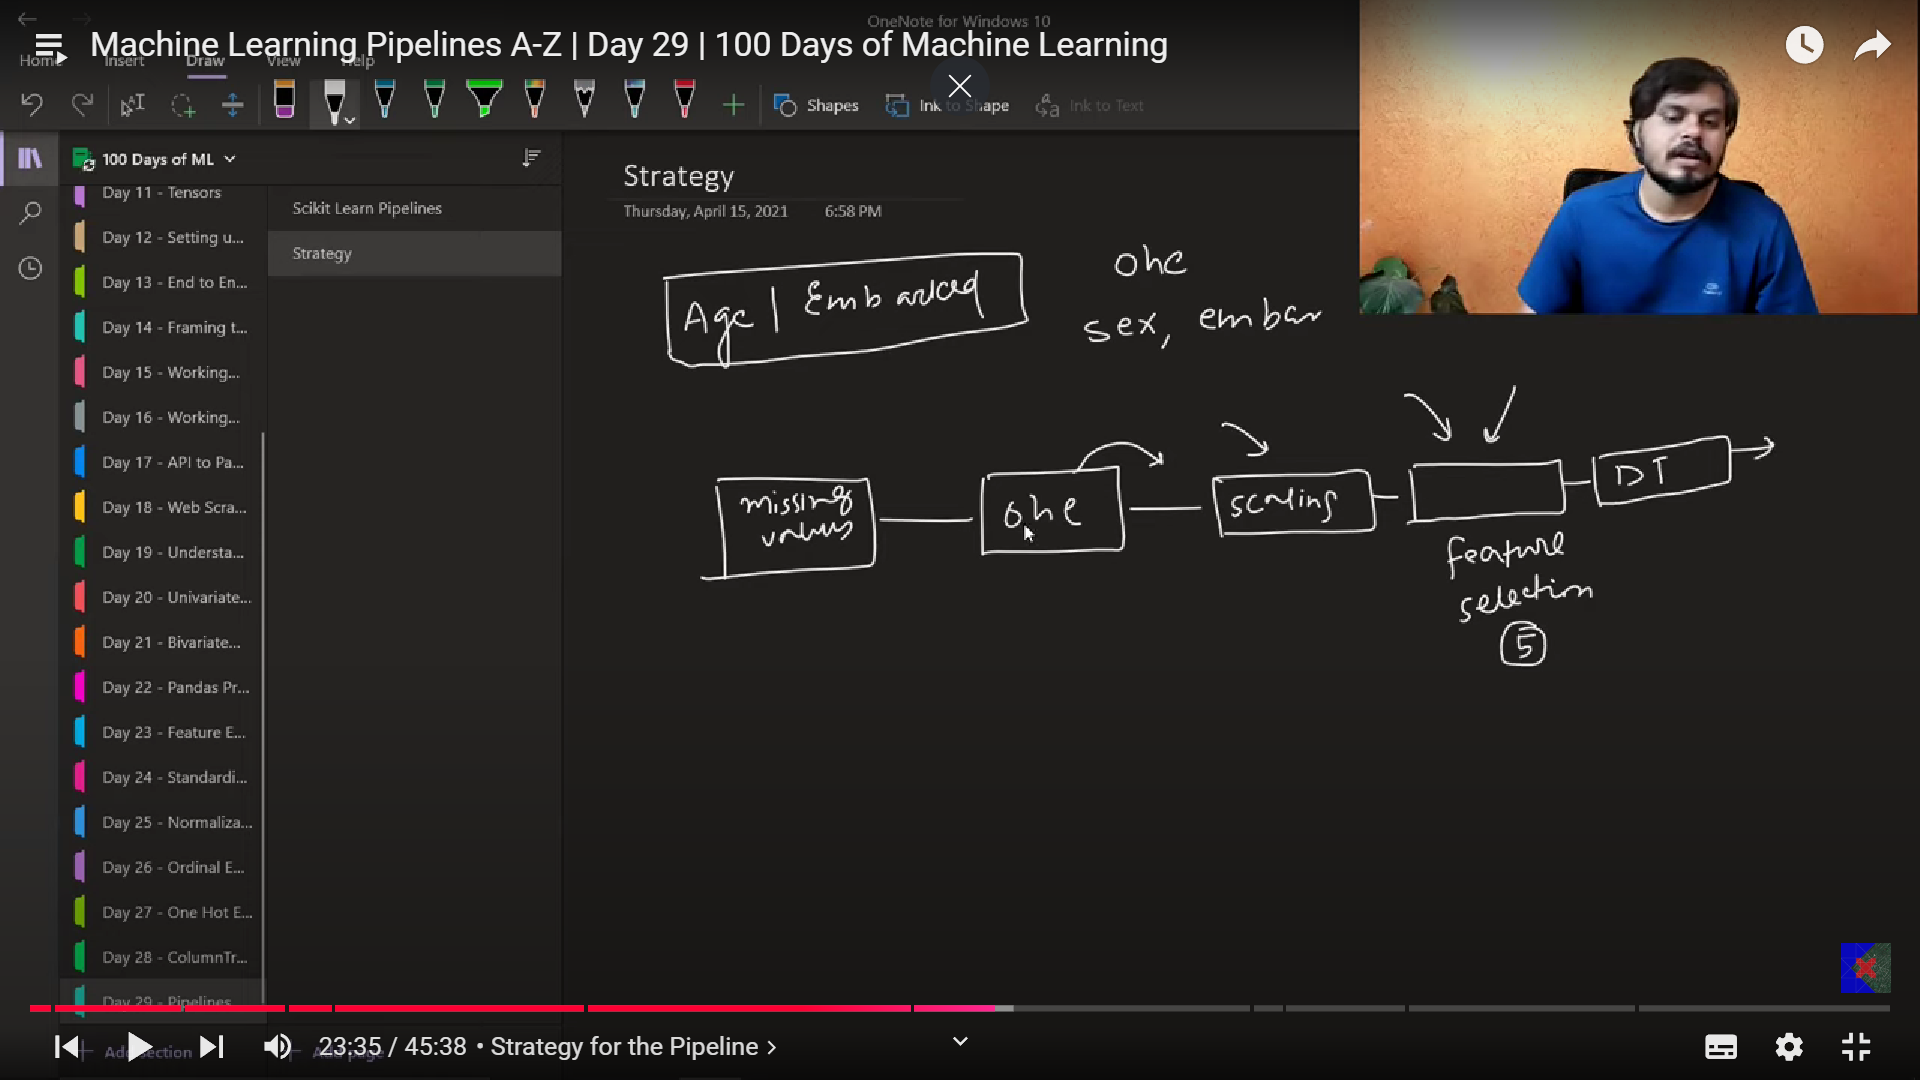

In [5]:
df.drop(columns=[	'PassengerId',	'Name',	'Ticket', 'Cabin'	] ,inplace = True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']) , df['Survived'], test_size=0.2, random_state=42)

In [7]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


In [8]:
X_train.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
304,3,male,NaN,0,0,8.0500,S
858,3,female,24.0,0,3,19.2583,C
569,3,male,32.0,0,0,7.8542,S
533,3,female,NaN,0,2,22.3583,C
635,2,female,28.0,0,0,13.0000,S


In [9]:
#Step 1 -> Imputation

trf1 = ColumnTransformer([
    ('impute_age', SimpleImputer(), [2]), #index value
    ('impute_embarked', SimpleImputer(strategy='most_frequent'),[6])
], remainder='passthrough')

In [10]:
trf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute_age', SimpleImputer(), [2]),
                                ('impute_embarked',
                                 SimpleImputer(strategy='most_frequent'),
                                 [6])])

In [11]:
# one hot encoding
trf2 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[1,6])
],remainder='passthrough')

In [12]:
trf2

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_sex_embarked',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 [1, 6])])

In [13]:
# Scaling

trf3 = ColumnTransformer([
    ('scaler', MinMaxScaler(),slice(0,10))
])
trf3

ColumnTransformer(transformers=[('scaler', MinMaxScaler(), slice(0, 10, None))])

In [14]:
# Feature selection
trf4 = SelectKBest(score_func=chi2,k=8)


In [15]:
# train the model
trf5 = DecisionTreeClassifier()

### Create Pipeline

In [16]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

### Pipeline Vs make_pipeline
Pipeline requires naming of steps, make_pipeline does not.

(Same applies to ColumnTransformer vs make_column_transformer)

In [17]:
# Alternate Syntax
# pipe = make_pipeline(trf1,trf2,trf3,trf4,trf5)

Below code:

here only fit is used because there is some reason learn it : https://www.youtube.com/watch?v=xOccYkgRV4Q&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=33&t=1843s

In [18]:
# train
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scaler', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x79b502e34e50>)),
                ('trf5', DecisionTreeClassifier())])

### Explore the Pipeline

In [19]:
# Code here
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [2]),
                                 ('impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  [1, 6])]),
 'trf3': ColumnTransformer(transformers=[('scaler', MinMaxScaler(), slice(0, 10, None))]),
 'trf4': SelectKBest(k=8, score_func=<function chi2 at 0x79b502e34e50>),
 'trf5': DecisionTreeClassifier()}

In [20]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')

In [21]:
# Predict
y_pred = pipe.predict(X_test)

In [22]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0])

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6256983240223464

###Cross Validation using Pipeline

Cross validation means change the values during testing

In [25]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

0.6391214419383433

### GridSearch using Pipeline

below code is the code Hyper parameter for Decision Tree [Tuning Nob]

In [26]:
# gridsearchcv
params = {
    'trf5__max_depth':[1,2,3,4,5,None]
}

In [27]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_age',
                                                                         SimpleImputer(),
                                                                         [2]),
                                                                        ('impute_embarked',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [6])])),
                                       ('trf2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_sex_embarked',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [1,
                                                                          6])])),
                                       ('trf3',
                                        ColumnTransformer(transformers=[('scaler',
                                                                         MinMaxScaler(),
                                                                         slice(0, 10, None))])),
                                       ('trf4',
                                        SelectKBest(k=8,
                                                    score_func=<function chi2 at 0x79b502e34e50>)),
                                       ('trf5', DecisionTreeClassifier())]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [29]:
grid.best_score_

0.6391214419383433

In [30]:
grid.best_params_

{'trf5__max_depth': 2}

### Exporting the Pipelin

In [31]:
# export
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

### Pickle

In [32]:

import pickle
import numpy as np

In [33]:
pipe = pickle.load(open('/content/pipe.pkl','rb'))

In [34]:
# Assume user input
test_input2 = np.array([2, 'male', 31.0, 0, 0, 10.5, 'S'],dtype=object).reshape(1,7)

In [35]:
pipe.predict(test_input2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


array([0])